# Многокритериальная оптимизация. БИ20-4, Чайковская, Петрова, Мытарева, Крылов, Иванова, Киракосян

Рассмотрим конкретный кейс из жизни: студент ищет однокомнатную квартиру для съёма у здания Финансового университета на Рязанском проспекте. На сайте, специализирующемся на недвижимости, было найдено несколько вариантов квартир. Необходимо выбрать лучший вариант недвижимости. 

In [1]:
#Загрузка библиотек
import pandas as pd
import numpy as np

#Считывание данных из csv файла
i = 0
import csv
with open("flat.csv", 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        i = i+1
        if i ==  1:
            number = list(map(int,row[0].split(';')))
        if i == 2:
            cost = list(map(int,row[0].split(';')))
        if i == 3:
            square = list(map(int,row[0].split(';')))
        if i == 4:
            time = list(map(int,row[0].split(';')))
        if i == 5:
            year = list(map(int,row[0].split(';')))
        if i == 6:
            grade = list(map(int,row[0].split(';')))
        if i == 7:
            floor = list(map(int,row[0].split(';')))
        if i == 8:
            height = list(map(float,row[0].split(';')))
        if i == 9:
            pledge = list(map(int,row[0].split(';')))
        if i == 10:
            kkk = list(map(int,row[0].split(';')))
        if i == 11:
            ideal = list(map(float,row[0].split(';')))
        if i == 12:
            contr = list(map(float,row[0].split(';')))
            
#Формирование массивов данных и поиск максимальных значений по критериям           
a = np.array(number)
b = np.array(cost)
max_number1 = max(b)
c = np.array(square)
max_number2 = max(c)
d = np.array(time)
max_number3 = max(d)
e = np.array(year)
max_number4 = max(e)
f = np.array(grade)
max_number5 = max(f)
g = np.array(floor)
max_number6 = max(g)
h = np.array(height)
max_number7 = max(h)
i = np.array(pledge)
max_number8 = max(i)
ii = np.array(ideal)
cc = np.array(contr)
q = np.array([b, c, d, e, f, g, h, i])
q = q.transpose()

hhh = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
hhh1 = ['Стоимость→min', 'Площадь→max', 'Время до метро→min', 'Год постройки→max', 'Оценка→max', 'Этаж→max', 'Потолок→max', 'Залог→min']

#Формирование таблицы с исходными данными
df = pd.DataFrame(data=q, index = hhh, columns = hhh1)
df

,Стоимость→min,Площадь→max,Время до метро→min,Год постройки→max,Оценка→max,Этаж→max,Потолок→max,Залог→min
1,35000.0,30.0,15.0,2010.0,6.0,6.0,2.7,10000.0
2,47000.0,39.0,10.0,2015.0,7.0,9.0,2.5,15000.0
3,42500.0,35.0,12.0,2009.0,5.0,4.0,3.0,13000.0
4,65000.0,43.0,10.0,2017.0,8.0,8.0,2.7,30000.0
5,38000.0,35.0,10.0,2013.0,5.0,5.0,2.8,12000.0
6,50500.0,44.0,15.0,2008.0,6.0,9.0,2.5,20000.0
7,48000.0,35.0,10.0,2006.0,7.0,4.0,3.0,14000.0
8,58000.0,42.0,10.0,2010.0,8.0,8.0,2.8,28000.0
9,54500.0,39.0,13.0,2018.0,7.0,6.0,2.7,22000.0
10,45000.0,40.0,17.0,2013.0,5.0,9.0,3.0,17000.0


# I Линейная свертка

In [2]:
#Формирование таблицы с максимальными значениями по критериям
def pretty_table(data, cell_sep=' | ', header_separator=True) -> str:
    rows = len(data)
    cols = len(data[0])

    col_width = []
    for col in range(cols):
        columns = [str(data[row][col]) for row in range(rows)]
        col_width.append(len(max(columns, key=len)))

    separator = "-+-".join('-' * n for n in col_width)

    lines = []

    for i, row in enumerate(range(rows)):
        result = []
        for col in range(cols):
            item = str(data[row][col]).rjust(col_width[col])
            result.append(item)

        lines.append(cell_sep.join(result))

        if i == 0 and header_separator:
            lines.append(separator)

    return '\n'.join(lines)

data = [
    ["Максимум", "Значение"],
    {"по стоимости": max_number1, "по площади": max_number2, "по времени до метро": max_number3, "по году постройки": max_number4, "по оценке постояльцев": max_number5, "по этажу": max_number6, "по высоте потолков": max_number7, "по залогу":max_number8}
]
rows = [
    data[0]
]
rows += [(k, v) for k, v in data[1].items()]
print(pretty_table(rows))

             Максимум | Значение
----------------------+---------
         по стоимости |    65000
           по площади |       44
  по времени до метро |       17
    по году постройки |     2018
по оценке постояльцев |        8
             по этажу |        9
   по высоте потолков |      3.0
            по залогу |    30000


In [3]:
#Коэффициенты значимости
kk = np.array(kkk)
kk1 = np.sum([kk])
koef = [-kk[0]/kk1, kk[1]/kk1, -kk[2]/kk1, kk[3]/kk1, kk[4]/kk1, kk[5]/kk1, kk[6]/kk1, -kk[7]/kk1]
kkkk = [kk, koef]
ind = ['Значимость', 'a (%) = ']
cpl = ['', '', '', '', '', '', '', '']
df1 = pd.DataFrame(data=kkkk, index = ind, columns = cpl)
df1

,,,,,,,,
Значимость,9.000000,6.000000,8.000000,3.000000,4.000000,5.000000,3.000000,6.000000
a (%) =,-0.204545,0.136364,-0.181818,0.068182,0.090909,0.113636,0.068182,-0.136364


In [4]:
b1 = b/max_number1
c1 = c/max_number2
d1 = d/max_number3
e1 = e/max_number4
f1 = f/max_number5
g1 = g/max_number6
h1 = h/max_number7
i1 = i/max_number8

p = np.array([b1, c1, d1, e1, f1, g1, h1, i1])
p = p.transpose()

hhh = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
hhh1 = ['Стоимость→min', 'Площадь→max', 'Время до метро→min', 'Год постройки→max', 'Оценка→max', 'Этаж→max', 'Потолок→max', 'Залог→min']

df2 = pd.DataFrame(data=p, index = hhh, columns = hhh1)
df2

,Стоимость→min,Площадь→max,Время до метро→min,Год постройки→max,Оценка→max,Этаж→max,Потолок→max,Залог→min
1,0.538462,0.681818,0.882353,0.996036,0.750,0.666667,0.900000,0.333333
2,0.723077,0.886364,0.588235,0.998513,0.875,1.000000,0.833333,0.500000
3,0.653846,0.795455,0.705882,0.995540,0.625,0.444444,1.000000,0.433333
4,1.000000,0.977273,0.588235,0.999504,1.000,0.888889,0.900000,1.000000
5,0.584615,0.795455,0.588235,0.997522,0.625,0.555556,0.933333,0.400000
6,0.776923,1.000000,0.882353,0.995045,0.750,1.000000,0.833333,0.666667
7,0.738462,0.795455,0.588235,0.994054,0.875,0.444444,1.000000,0.466667
8,0.892308,0.954545,0.588235,0.996036,1.000,0.888889,0.933333,0.933333
9,0.838462,0.886364,0.764706,1.000000,0.875,0.666667,0.900000,0.733333
10,0.692308,0.909091,1.000000,0.997522,0.625,1.000000,1.000000,0.566667


In [5]:
koef = [-kk[0]/kk1, kk[1]/kk1, -kk[2]/kk1, kk[3]/kk1, kk[4]/kk1, kk[5]/kk1, kk[6]/kk1, -kk[7]/kk1]

ww = p*koef
www = np.array([np.sum([ww[0]]), np.sum([ww[1]]), np.sum([ww[2]]), np.sum([ww[3]]), np.sum([ww[4]]), np.sum([ww[5]]), np.sum([ww[6]]), np.sum([ww[7]]), np.sum([ww[8]]), np.sum([ww[9]])])
www = www.transpose()

print ('Оптимальное значение', max(www), '- квартира № 2')

hhh = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
hhh2 = ['Показатель по линейной свертке']

df3 = pd.DataFrame(data=www, index = hhh, columns = hhh2)
df3

Оптимальное значение 0.11591243855226299 - квартира № 2


,Показатель по линейной свертке
1,0.050168
2,0.115912
3,0.030679
4,0.006834
5,0.078992
6,0.032591
7,0.052843
8,0.036890
9,-0.004825
10,0.029917


# II Метод идеальной точки

In [6]:
ii = np.array(ideal)
col = ['Идеальное значение']
ind1 = ['', '', '', '', '', '', '', '']
df4 = pd.DataFrame(data=ii, index = ind1, columns = col)
df4

,Идеальное значение
,20000.0
,65.0
,5.0
,2021.0
,10.0
,15.0
,3.5
,3000.0


In [8]:
b2 = 1/((ii[0]-b)/ii[0])
c2 = (ii[1]-c)/ii[1]
d2 = 1/((ii[2]-d)/ii[2])
e2 = (ii[3]-e)/ii[3]
f2 = (ii[4]-f)/ii[4]
g2 = (ii[5]-g)/ii[5]
h2 = (ii[6]-h)/ii[6]
i2 = 1/((ii[7]-i)/ii[7])

u = np.array([b2, c2, d2, e2, f2, g2, h2, i2])
u = u.transpose()

hhh = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
hhh1 = ['Стоимость→min', 'Площадь→max', 'Время до метро→min', 'Год постройки→max', 'Оценка→max', 'Этаж→max', 'Потолок→max', 'Залог→min']

df5 = pd.DataFrame(data=u, index = hhh, columns = hhh1)
df5

,Стоимость→min,Площадь→max,Время до метро→min,Год постройки→max,Оценка→max,Этаж→max,Потолок→max,Залог→min
1,-1.333333,0.538462,-0.500000,0.005443,0.4,0.600000,0.228571,-0.428571
2,-0.740741,0.400000,-1.000000,0.002969,0.3,0.400000,0.285714,-0.250000
3,-0.888889,0.461538,-0.714286,0.005938,0.5,0.733333,0.142857,-0.300000
4,-0.444444,0.338462,-1.000000,0.001979,0.2,0.466667,0.228571,-0.111111
5,-1.111111,0.461538,-1.000000,0.003958,0.5,0.666667,0.200000,-0.333333
6,-0.655738,0.323077,-0.500000,0.006432,0.4,0.400000,0.285714,-0.176471
7,-0.714286,0.461538,-1.000000,0.007422,0.3,0.733333,0.142857,-0.272727
8,-0.526316,0.353846,-1.000000,0.005443,0.2,0.466667,0.200000,-0.120000
9,-0.579710,0.400000,-0.625000,0.001484,0.3,0.600000,0.228571,-0.157895
10,-0.800000,0.384615,-0.416667,0.003958,0.5,0.400000,0.142857,-0.214286


In [9]:
wwww = [np.sum([(u[0])**2]), np.sum([(u[1])**2]), np.sum([(u[2])**2]), np.sum([(u[3])**2]), np.sum([(u[4])**2]), np.sum([(u[5])**2]), np.sum([(u[6])**2]),np.sum([(u[7])**2]), np.sum([(u[8])**2]), np.sum([(u[9])**2])]

print ('Оптимальное значение', min(wwww), '- квартира № 6')

hhh = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
hhh3 = ['Расстояние']

df6 = pd.DataFrame(data=wwww, index = hhh, columns = hhh3)
df6

Оптимальное значение 1.217186533980441 - квартира № 6


,Расстояние
1,3.073667
2,2.102838
3,2.411566
4,1.634459
5,3.293157
6,1.217187
7,2.445843
8,1.714423
9,1.413867
10,1.437882


In [10]:
#Задание функций с параметрами графика лепестковой диаграммы
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars, radius=0.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

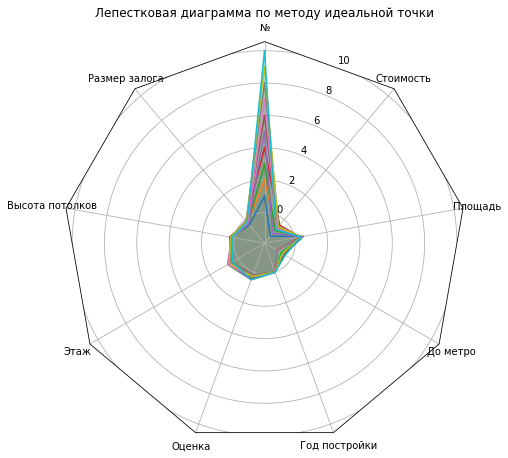

In [11]:
#Построение лепестковой диаграммы по методу идеальной точки
vect = np.array([a, b2, c2, d2, e2, f2, g2, h2, i2])
vect = vect.transpose()

data = [['№', 'Стоимость', 'Площадь', 'До метро', 'Год постройки', 'Оценка', 'Этаж', 'Высота потолков', 'Размер залога'],
        ('Лепестковая диаграмма по методу идеальной точки', 
                    [vect[0], vect[1], vect[2], vect[3], vect[4], vect[5], vect[6], vect[7], vect[8], vect[9]], 
                  
        )]

N = len(data[0])
theta = radar_factory(N, frame='polygon')                                     
spoke_labels = data.pop(0)
title, case_data = data[0]
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)
ax.set_rgrids([-2, 0, 2, 4, 6, 8, 10]) 
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for ddd in case_data:
    line = ax.plot(theta, ddd)
    ax.fill(theta, ddd,  alpha=0.25)
ax.set_varlabels(spoke_labels)

ax.set_theta_direction(-1) 

plt.show()

# III Метод контрольных показателей

In [12]:
cc = np.array(contr)
print (cc)
col = ['Контрольные показатели']
ind1 = ['', '', '', '', '', '', '', '']
df7 = pd.DataFrame(data=cc, index = ind1, columns = col)
df7

[8.000e+04 2.000e+01 2.500e+01 2.007e+03 3.000e+00 2.000e+00 2.300e+00
 4.000e+04]


,Контрольные показатели
,80000.0
,20.0
,25.0
,2007.0
,3.0
,2.0
,2.3
,40000.0


In [13]:
b3 = 1/(b/cc[0])
c3 = c/cc[1]
d3 = 1/(d/cc[2])
e3 = e/cc[3]
f3 = f/cc[4]
g3 = g/cc[5]
h3 = h/cc[6]
i3 = 1/(i/cc[7])

u1 = np.array([b3, c3, d3, e3, f3, g3, h3, i3])
u1 = u1.transpose()

hhh = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
hhh1 = ['Стоимость→min', 'Площадь→max', 'Время до метро→min', 'Год постройки→max', 'Оценка→max', 'Этаж→max', 'Потолок→max', 'Залог→min']

df8 = pd.DataFrame(data=u1, index = hhh, columns = hhh1)
df8

,Стоимость→min,Площадь→max,Время до метро→min,Год постройки→max,Оценка→max,Этаж→max,Потолок→max,Залог→min
1,2.285714,1.50,1.666667,1.001495,2.000000,3.0,1.173913,4.000000
2,1.702128,1.95,2.500000,1.003986,2.333333,4.5,1.086957,2.666667
3,1.882353,1.75,2.083333,1.000997,1.666667,2.0,1.304348,3.076923
4,1.230769,2.15,2.500000,1.004983,2.666667,4.0,1.173913,1.333333
5,2.105263,1.75,2.500000,1.002990,1.666667,2.5,1.217391,3.333333
6,1.584158,2.20,1.666667,1.000498,2.000000,4.5,1.086957,2.000000
7,1.666667,1.75,2.500000,0.999502,2.333333,2.0,1.304348,2.857143
8,1.379310,2.10,2.500000,1.001495,2.666667,4.0,1.217391,1.428571
9,1.467890,1.95,1.923077,1.005481,2.333333,3.0,1.173913,1.818182
10,1.777778,2.00,1.470588,1.002990,1.666667,4.5,1.304348,2.352941


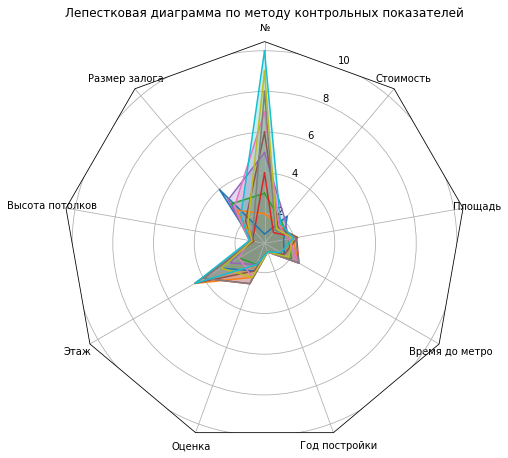

In [14]:
#Лепестковая диаграмма по методу контрольных показателей
vect1 = np.array([a, b3, c3, d3, e3, f3, g3, h3, i3])
vect1 = vect1.transpose()

data1 = [['№', 'Стоимость', 'Площадь', 'Время до метро', 'Год постройки', 'Оценка', 'Этаж', 'Высота потолков', 'Размер залога'],
        ('Лепестковая диаграмма по методу контрольных показателей', 
                    [vect1[0], vect1[1], vect1[2], vect1[3], vect1[4], vect1[5], vect1[6], vect1[7], vect1[8], vect1[9]], 
                  
        )]

N = len(data1[0])
theta = radar_factory(N, frame='polygon')                                     
spoke_labels = data1.pop(0)
title, case_data = data1[0]
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)
ax.set_rgrids([-2, 0, 2, 4, 6, 8, 10]) 
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for ddd in case_data:
    line = ax.plot(theta, ddd)
    ax.fill(theta, ddd,  alpha=0.25)
ax.set_varlabels(spoke_labels)

ax.set_theta_direction(-1) 

plt.show()

In [15]:
wwwww = [min(u1[0]), min(u1[1]), min(u1[2]), min(u1[3]), min(u1[4]), min(u1[5]), min(u1[6]), min(u1[7]), min(u1[8]), min(u1[9])]
for i in wwwww:
    if i <1:
        wwwww.remove (i)
        print ('Оптимальное значение', max(wwwww), '- квартира № 9')

hhh = ['1', '2', '3', '4', '5', '6', '8', '9', '10']
hhh3 = ['Расстояние']

df9 = pd.DataFrame(data=wwwww, index = hhh, columns = hhh3)
df9

Оптимальное значение 1.00548081714001 - квартира № 9


,Расстояние
1,1.001495
2,1.003986
3,1.000997
4,1.004983
5,1.002990
6,1.000498
8,1.001495
9,1.005481
10,1.002990
